In [986]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.path as mpath
import time

In [987]:
"Função para plotar o potencial -> x,y,V"

def plot2D(x, y, V):
    fig = plt.figure(figsize=(10, 10), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, V[:], rstride=1, cstride=1, cmap=cm.magma,
            linewidth=1, antialiased=False)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$V$')
    plt.show();

In [988]:
"Plota as equipotenciais"
def plot_equip(x,y,V):
    fig = plt.contourf(x,y,V,20,cmap='magma')
    plt.rcParams['figure.figsize'] = (8,8)
    plt.colorbar()
    plt.title('Linhas equipotenciais do Potencial Elétrico')
    plt.xlabel("x")
    plt.ylabel("y")
    #plt.axes().set_aspect('equal')

In [989]:
"Calcula a equação de Laplace"
def laplace2d(V,nx,ny,l1norm_target,d1,d2):
    l1norm = 1
    Vn = np.empty_like(V)
    contador = 0
    while l1norm > l1norm_target:
        Vn = V.copy()
        for i in range (1,int(((nx-1)/2)+1)):
            for j in range (1,int(((ny-1)/2)+1)):
                V[j,i] = 0.25*(Vn[j+1,i] + Vn[j-1,i] + Vn[j,i+1] + Vn[j,i-1])
                
        #Usando a simetria        
        V[int(((ny-1)/2)+1),1:int(((nx-1)/2)+1)] = V[int(((ny-1)/2)-1),1:int(((ny-1)/2)+1)]
        V[1:int(((ny-1)/2)+1),int(((nx-1)/2)+1)] = (-1)*V[1:int(((ny-1)/2)+1),int(((nx-1)/2)-1)]

            
        #Condições de Contorno
        V[:, 0] = 0  # V = 0 @ x = -1
        V[:, nx-1] = 0  # V = 0 @ x = 1
        V[0,:] = 0  # V = 0 @ y = -1
        V[ny-1,:] = 0  # V = 0 @ y = 1
        V[int(round(((ny-1)/2)*(3/5))):int(round(((ny-1)/2)*(7/5)+1)),int(round(((nx-1)/2)*(d1/5)))]=1 #Placa em x = -0.4
        V[int(round(((ny-1)/2)*(3/5))):int(round(((ny-1)/2)*(7/5)+1)),int(round(((nx-1)/2)*(d2/5)))]=-1 
        #Calculando a norma
        l1norm = np.sqrt(np.sum((V - Vn)**2)/np.sum(Vn**2))
        
        
        contador += 1 

    #Agora completando o resto
    for i in range(1,int(((nx-1)/2)+1)):
        for j in range(1,int(((ny-1)/2)+1)):
            V[j,((nx-1)-i)] = (-1)*V[j,i] 
            V[(ny-1-j),i] = V[j,i]
            V[(ny-1-j),(ny-1-i)] = (-1)*V[j,i]
    
    #print("Iterações=",contador)
    return V

In [990]:
def campo_eletrico(V):
    Ex = + np.roll(V, 1, axis = 0) - np.roll(V, -1, axis = 0) #Calculate the discrete derivation
    Ey = +np.roll(V, 1, axis = 1) - np.roll(V, -1, axis = 1)
    E = np.sqrt(Ex**2 + Ey**2)
    return Ex, Ey, E

In [991]:
def plot_campo_eletrico(nx, ny, x, y, Ex, Ey, E, V):
    #plt.clf()
    #plt.streamplot(x, y, Ey, Ex, density=[1., 1.], color = E, cmap='magma')
    #fig = plt.figure(figsize=(8, 8))
    fig, ax = plt.subplots()
    fig = plt.contourf(x,y,V,20,cmap='magma')
    ax.streamplot(x, y, Ey, Ex, density=[1., 1.], color = 'white', cmap='magma')
    ax.plot(x[int((nx-1)/2)], y[int(round(((nx-1)/2)*(8/5)))], 'o', color = 'white', markersize=10) #Marca o ponto que estamos calculando E
    ax.annotate('', fontsize=16, color = 'black', xy=(x[int((nx-1)/2)], y[int(round(((nx-1)/2)*(8/5)))]), xytext=(x[int(nx-30)], y[int(ny-7)]), arrowprops=dict(facecolor='black', shrink=0.05))
    ax.text(x[int(nx-30)], y[int(ny-7)], 'Campo de borda',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc='white', ec="black", pad=0.2)})
    plt.xlabel("x", fontsize = 18)
    plt.ylabel("y", fontsize = 18)
    plt.show()

In [992]:
"Definindo a rede"
nx = 101 #número de divisões em x
ny = 101 #número de divisões em y
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
d1 = 3
d2 = 10 - d1

In [993]:
"Condições de contorno"
V = np.zeros((ny, nx))  # create a XxY vector of 0's
V[:, 0] = 0  # V = 0 @ x = -1
V[:, nx-1] = 0  # V = 0 @ x = 1
V[0,:] = 0  # V = 0 @ y = -1
V[ny-1,:] = 0  # V = 0 @ y = 1
V[int(round(((ny-1)/2)*(3/5))):int(round(((ny-1)/2)*(7/5)+1)),int(round(((nx-1)/2)*(d1/5)))]=1 #Placa em x = -0.4
V[int(round(((ny-1)/2)*(3/5))):int(round(((ny-1)/2)*(7/5)+1)),int(round(((nx-1)/2)*(d2/5)))]=-1 #Placa em x = 0.4

In [994]:
"Inicia o relógio"
t0 = time.process_time()

In [995]:
V=laplace2d(V,nx,ny,1e-8,d1,d2)

In [996]:
"Termina o relógio e conta"
t1 = time.process_time()
dt = t1 - t0
print('Tempo =', dt)

Tempo = 19.914255999999796


In [997]:
"Calculando o campo eletrico"
Ex = np.zeros((ny, nx))
Ey = np.zeros((ny, nx))
Ex, Ey, E = campo_eletrico(V)

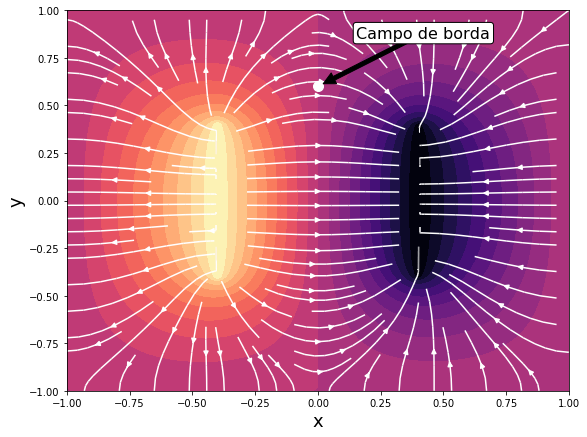

In [998]:
"Plotando o campo eletrico"
plot_campo_eletrico(nx, ny, x, y, Ex, Ey, E, V)

In [999]:
E[int(round(((ny-1)/2)*(8/5))),int((nx-1)/2)]

0.04268403713855669

In [1000]:
x[int(round(((nx-1)/2)*(d2/5)))]-x[int(round(((nx-1)/2)*(d1/5)))]

0.8000000000000002

In [1001]:
data = np.loadtxt('Electric_distance_2.txt')
d = data[:,0]
E_fringe = data[:,1]

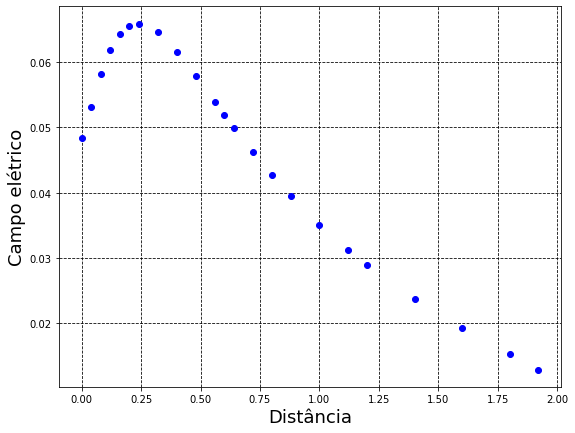

In [1008]:
plt.plot(d, E_fringe, 'bo')
plt.xlabel("Distância", fontsize = 18)
plt.ylabel("Campo elétrico", fontsize = 18)
plt.rc('grid', linestyle="dashed", color='black')
plt.grid()
plt.rcParams['figure.figsize'] = (9,7)

In [1003]:
def fit_campo_eletrico(d,a,b):
    return a - b*d

In [1004]:
from scipy.optimize import curve_fit
import math

In [1005]:
pars, cov = curve_fit(f=fit_campo_eletrico, xdata=d[0:13], ydata=E_fringe[0:13], p0=[1,-1], bounds=(-np.inf, np.inf))

In [1006]:
'Calculando R^2'
res = E_fringe[0:13] - fit_campo_eletrico(d[0:13], *pars)
ss_res = np.sum(res**2)
ss_tot = np.sum((E_fringe[0:13]-np.mean(E_fringe[0:13]))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

0.9756896906425676


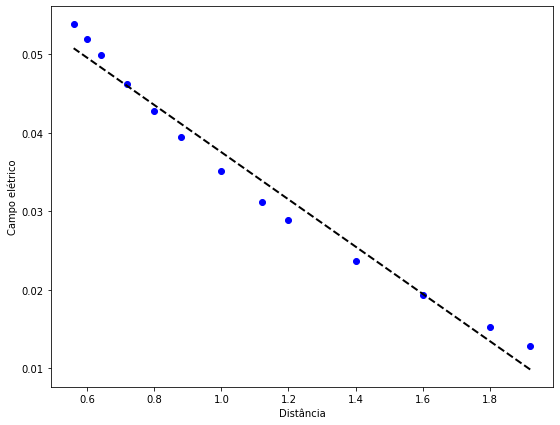

In [1007]:
plt.plot(d[0:13], E_fringe[0:13], 'bo')
plt.xlabel("Distância")
plt.ylabel("Campo elétrico")
plt.plot(d[0:13], fit_campo_eletrico(d[0:13], *pars), linestyle='--', linewidth=2, color='black')